<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

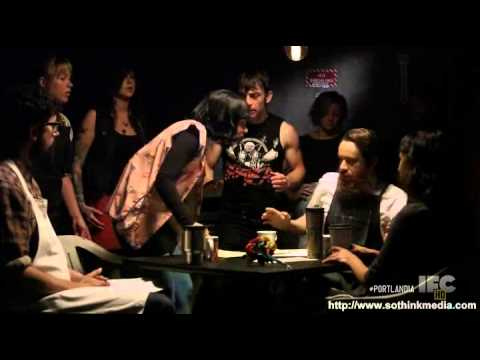

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jing/Documents/LambdaSchool/LS_DS_unit4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


Clean the data, rename column names, drop text in rating col:

In [2]:
from textblob import TextBlob 

df = shops.copy()
df = df.rename(columns={'coffee_shop_name':'coffee_shop', 'full_review_text':'review', 'star_rating':'rating'})

In [3]:
# Inspect the the review text column:

df.iloc[5][1]

" 11/20/2016 1 check-in Very cute cafe! I think from the moment I stepped in, there really wasn't anything I didn't find cute at The Factory. From their decor to their cups, everything was really cute. It's really the perfect place for a catching up with friends or a coffee date.  When you go order, there's really the least amount of interaction ever with the workers. You just pick your order on an iPad and they'll call your order out after for you to pick up at the counter. The whole thing's pretty novel honestly. I got the Viva Matcha Latte and it was so good! Perfect amount of sweetness and perfect temperature. I went on a cold night and this cafe is just so cozy, it was such a great combination. They have these swings as well which were pretty fun to sit on honestly.  Prices are what I would expect for a cafe like this, not super cheap, but not too pricey. There's no wifi here, so if you want to study, maybe this isn't the right place. But overall, very nice atmosphere! Viva matcha

In [4]:
# Clean rating col:
df['rating']=df['rating'].map(lambda x: float(x.rstrip('star rating')))

# Clean review col:  
df['date'] = df['review'].apply(lambda x: x.split()[0])
df['review'] = df['review'].apply(lambda x: " ".join(x.split()[1:]))

df.head()

,coffee_shop,review,rating,date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016


In [5]:
# Add a few columns to facilitate later analysis:
df['polarity'] = df['review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['review'].astype(str).apply(len)
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

df.head()

,coffee_shop,review,rating,date,polarity,review_len,word_count
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016,0.503472,547,97
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016,0.465625,295,47
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016,0.022222,1262,240
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2.0,11/25/2016,0.157118,366,67
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016,0.171596,635,116


In [8]:
# Import libarary to tokenize the customer reviews
from collections import Counter
import spacy

from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [9]:
#Add customized stop words:
STOP_WORDS = nlp.Defaults.stop_words.union(['i', 'we', 'us', 'me', 'coffee',\
                                            'drink','review','check', 'in', 'place',\
                                            'order', 'say', 'get', 'food', 'come', 'go'])

In [27]:
# # I pondered about what is important in review in this case, probably just adjective and adverbs, might be wrong, but let's try it!

# tokens =[]
# for doc in tokenizer.pipe(df['review'], batch_size=500):
#     doc_tokens = []
#     for token in doc:
#         if token.pos_ == 'ADJ' or token.pos_ == 'ADV':
#             doc_tokens.append(token.text.lower())
#     tokens.append(doc_tokens)        
    
# df['tokens']=tokens    
# df['tokens'].head()

0    []
1    []
2    []
3    []
4    []
Name: tokens, dtype: object

Lemmatization: remove pronouns, punctuation, and stop words

In [10]:
def get_lemmas(text):
    lemmas = []    
    doc = nlp(text)    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON') and (token.text.lower() not in STOP_WORDS):
            # pos_: part of speech tagging, assigning word types to tokens, like verb or noun.
            lemmas.append(token.lemma_)
    
    return lemmas

df['lemmas'] = df['review'].apply(get_lemmas)

In [11]:
# how many reviews each coffee shop gets
df['coffee_shop'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
Caffé Medici                            143
Apanas Coffee & Beer                    136
The Hideout Coffeehouse                 100
Hot Mama’s Cafe                         100
Corona Coffee                           100
Vintage Heart Coffee                    100
Quack’s 43rd Street Bakery              100
Patika                                  100
TOMS                                    100
Kick Butt Coffee Music & Booze          100
Dolce Neve                              100
Cuvée Coffee Bar                        100
Thunderbird Coffee                      100
Flightpath Coffeehouse                  100
Irie Bean Coffee Bar                    100
Lola Savannah Coffee Lounge             100
Juan Pelota                             100
Jo’s Coffee                     

In [12]:
## Get rid of empty string in the list:  J: didn't work, why????
# for doc in docs:
#     doc = list(filter(None, doc))
#     print(doc)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [13]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()
        # count-based rank
        
        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        # percentage of total appearrance
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()
        # cumulative percentage of total appearance
        
        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
# Overall token count
wc = count(df['lemmas'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
155,good,3590,5393,1.0,0.016018,0.016018,0.471376
111,great,2843,3924,2.0,0.011655,0.027673,0.373293
153,like,2273,3379,3.0,0.010036,0.037709,0.298451
475,time,1763,2382,4.0,0.007075,0.044784,0.231486
2,love,1799,2339,5.0,0.006947,0.051732,0.236213
56,Austin,1785,2274,6.0,0.006754,0.058486,0.234375
14,1,2143,2248,7.0,0.006677,0.065163,0.281381
5,shop,1630,2185,8.0,0.006490,0.071653,0.214023
72,try,1671,2139,9.0,0.006353,0.078006,0.219407
632,work,1492,1923,10.0,0.005712,0.083717,0.195903


In [15]:
# Token count by rating
df['lemmas'].groupby(df['rating']).apply(count)

word  appears_in  count     rank  pct_total  cul_pct_total  \
rating                                                                          
1.0    108         like         104    173      1.0   0.012412       0.012412   
       52       service          94    129      2.0   0.009255       0.021667   
       64            go          82    128      3.0   0.009184       0.030851   
       93          time          86    127      4.0   0.009112       0.039963   
       57      customer          65    112      5.0   0.008036       0.047998   
       42          good          83    111      6.0   0.007964       0.055962   
       329          ask          69    108      7.0   0.007749       0.063711   
       31           get          77     99      8.0   0.007103       0.070814   
       49             $          61     98      9.0   0.007031       0.077845   
       358          say          49     90     10.0   0.006457       0.084302   
       97         order          64     83     11.0   0.005955       0.090257   
       1            try          58     80     12.0   0.005740       0.095997   
       117         come          62     78     13.0   0.005596       0.101593   
       421         work          51     75     14.0   0.005381       0.106974   
       137      barista          48     74     15.0   0.005309       0.112283   
       27         taste          52     73     16.0   0.005237       0.117520   
       339        think          53     73     17.0   0.005237       0.122758   
       236         know          52     72     18.0   0.005166       0.127924   
       366          bad          57     72     19.0   0.005166       0.133089   
       292         tell          51     71     20.0   0.005094       0.138183   
       373         look          48     71     21.0   0.005094       0.143277   
       195       people          50     70     22.0   0.005022       0.148300   
       495         want          51     68     23.0   0.004879       0.153178   
       278         rude          46     66     24.0   0.004735       0.157914   
       86      employee          45     65     25.0   0.004664       0.162577   
       204        great          40     58     26.0   0.004161       0.166738   
       319         wait          41     58     27.0   0.004161       0.170900   
       381         take          46     58     28.0   0.004161       0.175061   
       55        friend          36     57     29.0   0.004090       0.179151   
       217        thing          43     54     30.0   0.003874       0.183025   
...                 ...         ...    ...      ...        ...            ...   
5.0    11138      citur           1      1  11142.0   0.000007       0.999806   
       11140  immediate           1      1  11143.0   0.000007       0.999813   
       11139     stingy           1      1  11144.0   0.000007       0.999820   
       11141         se           1      1  11145.0   0.000007       0.999826   
       11142     Midori           1      1  11146.0   0.000007       0.999833   
       11143        lag           1      1  11147.0   0.000007       0.999840   
       11145     Masala           1      1  11148.0   0.000007       0.999846   
       11144      side-           1      1  11149.0   0.000007       0.999853   
       11146   ciabatta           1      1  11150.0   0.000007       0.999860   
       11148       Soup           1      1  11151.0   0.000007       0.999866   
       11147   Mojteato           1      1  11152.0   0.000007       0.999873   
       11152    stratta           1      1  11153.0   0.000007       0.999880   
       11151        cal           1      1  11154.0   0.000007       0.999886   
       11153  intestine           1      1  11155.0   0.000007       0.999893   
       11149      Pearl           1      1  11156.0   0.000007       0.999900   
       11155   sequence           1      1  11157.0   0.000007       0.999906   
       11157  1,367,468           1      1  11158.

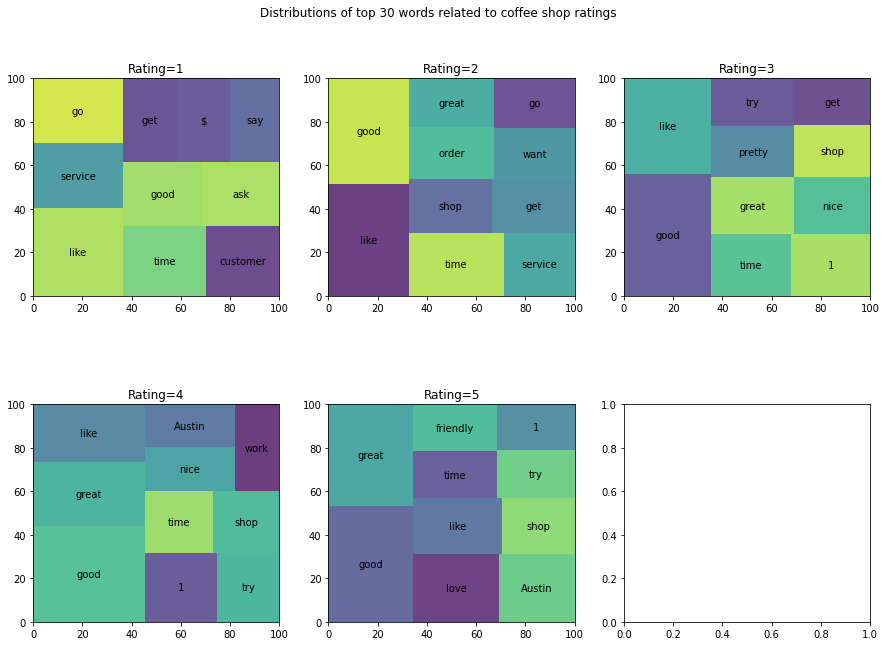

In [18]:
import squarify
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(15, 10), nrows=2, ncols=3)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of top 30 words related to coffee shop ratings')

# for ax, feature, name in zip(axes.flatten(), data.data.T, data.feature_names):
#     sns.distplot(feature, ax=ax, bins=len(np.unique(data.data.T[0]))//2)
#     ax.set(title=name[:-4].upper(), xlabel='cm')
    
for ax, score in zip(axes.flatten(), range(1, 6)):
    
    df_subset = df[df['rating']==score]
    wc = count(df_subset['lemmas'])
    
    wc_top = wc[wc['rank'] <= 10]
    
    squarify.plot(ax = ax, sizes=wc_top['pct_total'], label=wc_top['word'], alpha=.8 )
    ax.set(title = f'Rating={score}')

### According to the above visualization on tokens of review text, rating 1 is not associated with any positive word. "Good, Great" are the top counted words associated with ratings above 4.

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [21]:
# Group By with Rating & Word
tokens = df[['lemmas']]['lemmas']\
                        .apply(pd.Series)\
                        .reset_index()\
                        .melt(id_vars="index")\
                        .dropna()[['index', 'value']]\
                        .sort_values('index')\
                        .set_index('index')

In [22]:
# Join tokens df with rating col
tokens = tokens.join(df[['rating']], how='inner')

In [23]:
word_rating = tokens.groupby('value').mean()

In [25]:
word_count = tokens.groupby('value').count()
words = word_rating.join(word_count, lsuffix='_mean', rsuffix='_count')
words.sort_values(by=['rating_count', 'rating_mean'], ascending=False)

,rating_mean,rating_count
value,,
good,4.182459,5393
great,4.369521,3924
like,3.903522,3379
time,3.979009,2382
love,4.480547,2339
Austin,4.363676,2274
1,4.106317,2248
shop,4.158352,2185
try,4.105189,2139


In [33]:
words.sort_values('rating_mean', ascending=False)

,rating_mean,rating_count
value,,
emporium,5.0,1
Wowza,5.0,1
YASSSSSSS,5.0,1
YAS,5.0,2
YA'LL,5.0,1
Y'all,5.0,4
Xy,5.0,1
Wunder,5.0,1
Writers,5.0,4


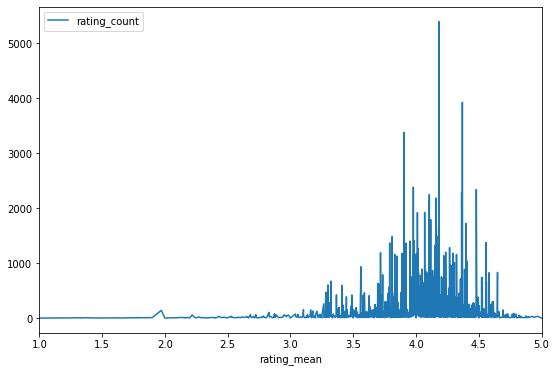

In [47]:
# word rating vs count
fig, ax = plt.subplots(figsize=(9, 6))
words.sort_values('rating_mean', ascending=False).groupby('rating_mean').mean().plot(ax=ax)
plt.show()

### From above visualization, we can see by assigning each word a rating score, the best coffee shop has a high count of high-rating words, the worst coffee shop have a very low count of nice words.

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

